# Forbes 2000 Largest Companies Analysis (2019)

In [1299]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as stats
import csv
import re

# Spider forbes2 needs to be fixed
# do more year stuff
# do a heatmap
# gonna need plots for groupby country and industry
# compare top 100 with the middle of the table

### Import Scraped Data

In [1300]:
forbes1 = pd.read_csv("forbes1.csv", header = None)
forbes2 = pd.read_csv("forbes2.csv", header = None)

### Set up data frame for analysis

In [1301]:
forbes1.shape

(2001, 6)

In [1302]:
forbes1.columns = ['Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value']

In [1303]:
forbes1.head()

,Company,Country,Sales,Profits,Assets,Market Value
0,ICBC,China,$165.3 B,$43.7 B,"$4,210.9 B",$311 B
1,China Construction Bank,China,$143.2 B,$37.2 B,"$3,631.6 B",$261.2 B
2,JPMorgan Chase,United States,$118.2 B,$26.5 B,"$2,609.8 B",$387.7 B
3,Berkshire Hathaway,United States,$235.2 B,$39.7 B,$702.7 B,$491.9 B
4,Agricultural Bank of China,China,$129.3 B,$29.6 B,"$3,439.3 B",$184.1 B


In [1304]:
forbes2.shape

(2027, 7)

In [1305]:
forbes2 = forbes2.drop_duplicates()

In [1306]:
forbes2.shape

(1998, 7)

In [1307]:
forbes2.columns = ['CompRank', 'Market Capitalization', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees']

In [1308]:
forbes2.head()

,CompRank,Market Capitalization,Industry,Founded,Country,Chairman,Employees
0,#1 ICBC,$311B,Major Banks,1984,China,Shu Gu,"453,048"
1,#2 China Construction Bank,$261.2B,Major Banks,1954,China,Wang Zuji,"352,621"
2,#3 JPMorgan Chase,$387.7B,Major Banks,1968,United States,Jamie Dimon,"252,539"
3,#4 Berkshire Hathaway,$491.9B,Investment Services,1955,United States,Warren Buffett,"377,000"
4,#5 Agricultural Bank of China,$184.1B,Regional Banks,1951,China,Huan Zhao,"487,307"


### Fix column names so that the data frames can be merged
CompRank combines the rank and name so they will be split and placed into separate columns

In [1309]:
forbes2[["Rank", "Name"]] = forbes2['CompRank'].str.split(n = 1, expand = True)

In [1310]:
forbes2 = forbes2.drop(['CompRank'], axis = 1)

In [1311]:
forbes2.columns = ['Market Value', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees', 'Rank', 'Company']

# Merge data frames

In [1312]:
forbes = forbes2.merge(forbes1, on = 'Company')

In [1313]:
forbes.columns

Index(['Market Value_x', 'Industry', 'Founded', 'Country_x', 'Chairman',
       'Employees', 'Rank', 'Company', 'Country_y', 'Sales', 'Profits',
       'Assets', 'Market Value_y'],
      dtype='object')

In [1314]:
forbes = forbes.drop(["Market Value_x", "Country_x"], axis = 1)

In [1315]:
cols = forbes.columns.tolist()
cols = ['Rank', 'Company', 'Country_y', 'Industry', 'Assets', 'Sales', 'Profits', 'Market Value_y', 'Employees', 'Founded', 'Chairman']

In [1316]:
forbes = forbes[cols]

In [1317]:
forbes = forbes.rename(columns = {'Country_y': 'Country', 'Market Value_y': 'Market Capitalization'})

In [1318]:
forbes.shape

(1967, 11)

In [1319]:
forbes.head()

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
0,#1,ICBC,China,Major Banks,"$4,210.9 B",$165.3 B,$43.7 B,$311 B,"453,048",1984,Shu Gu
1,#2,China Construction Bank,China,Major Banks,"$3,631.6 B",$143.2 B,$37.2 B,$261.2 B,"352,621",1954,Wang Zuji
2,#3,JPMorgan Chase,United States,Major Banks,"$2,609.8 B",$118.2 B,$26.5 B,$387.7 B,"252,539",1968,Jamie Dimon
3,#4,Berkshire Hathaway,United States,Investment Services,$702.7 B,$235.2 B,$39.7 B,$491.9 B,"377,000",1955,Warren Buffett
4,#5,Agricultural Bank of China,China,Regional Banks,"$3,439.3 B",$129.3 B,$29.6 B,$184.1 B,"487,307",1951,Huan Zhao


### Fix mismatched data
Some data was mismatched in the second scraper and unfortunately have to drop some rows because the webpage has been updated.

In [1320]:
forbes['Employees'] = forbes['Employees'].astype(str)
forbesFix =  forbes.loc[forbes['Employees'].str.contains('[A-Za-z]')].index
forbes.drop(forbesFix, inplace=True)

In [1321]:
forbes['Employees'] = forbes['Employees'].str.replace(",", "")
forbes["Employees"] = pd.to_numeric(forbes["Employees"])

In [1322]:
forbes.shape

(1806, 11)

### Create function to convert dollar values

In [1323]:
def convert_str_to_float(s):
    try:
        num, order = s.strip().split()
        num = float(num)
        if order == 'B':
            return num * 1000000000
        elif order == 'M':
            return num * 1000000
        else:
            pass
    except:
        pass

### Convert dollar values to float

In [1324]:
forbes['Assets'] = forbes['Assets'].str.replace(",", "")
forbes['Assets'] = forbes['Assets'].str.replace("$", "")
forbes['Assets'] = forbes['Assets'].apply(convert_str_to_float)

C:\Users\valfe\AppData\Local\Temp\ipykernel_1900\2453056257.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Assets'] = forbes['Assets'].str.replace("$", "")


In [1325]:
forbes['Sales'] = forbes['Sales'].str.replace(",", "")
forbes['Sales'] = forbes['Sales'].str.replace("$", "")
forbes['Sales'] = forbes['Sales'].apply(convert_str_to_float)

C:\Users\valfe\AppData\Local\Temp\ipykernel_1900\2184177535.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Sales'] = forbes['Sales'].str.replace("$", "")


In [1326]:
forbes['Profits'] = forbes['Profits'].str.replace(",", "")
forbes['Profits'] = forbes['Profits'].str.replace("$", "")
forbes['Profits'] = forbes['Profits'].apply(convert_str_to_float)

C:\Users\valfe\AppData\Local\Temp\ipykernel_1900\2489106819.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Profits'] = forbes['Profits'].str.replace("$", "")


In [1327]:
forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace(",", "")
forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace("$", "")
forbes['Market Capitalization'] = forbes['Market Capitalization'].apply(convert_str_to_float)

C:\Users\valfe\AppData\Local\Temp\ipykernel_1900\1217367912.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace("$", "")


In [1328]:
forbes = forbes.apply(pd.to_numeric, errors='ignore')

In [1329]:
numerical_features = forbes.dtypes[forbes.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = forbes.dtypes[forbes.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  6
Number of Categorical features:  5


In [1330]:
print(categorical_features)

Index(['Rank', 'Company', 'Country', 'Industry', 'Chairman'], dtype='object')


In [1331]:
print(numerical_features)

Index(['Assets', 'Sales', 'Profits', 'Market Capitalization', 'Employees',
       'Founded'],
      dtype='object')


### Fix Missing Values

In [1332]:
total = forbes.isnull().sum().sort_values(ascending=False)
percent = (forbes.isnull().sum()/forbes.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Percent > 0]

,Total,Percent
Assets,3,0.001661
Market Capitalization,2,0.001107


In [1333]:
forbes.loc[forbes['Assets'].isnull()]

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
824,#842,Infineon Technologies,Germany,Semiconductors,NaN,8.500000e+09,1.300000e+09,3.240000e+10,37479,1999,Reinhard Ploss
1623,#1650,IndusInd Bank,India,Regional Banks,NaN,2.800000e+09,4.280000e+08,1.690000e+10,25314,1994,Romesh Sobti
1831,#1860,Bank of Greece,Greece,Major Banks,NaN,1.700000e+09,1.100000e+09,3.540000e+08,1864,1927,Konstantinos Michalidis


In [1334]:
forbes.loc[forbes['Market Capitalization'].isnull()]

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
1087,#1108,Hainan Airlines,China,Airline,2.960000e+10,9.400000e+09,5.830000e+08,NaN,24772,1989,Jian Sun
1227,#1250,Wanhua Chemical Group,China,Specialized Chemicals,1.060000e+10,8.300000e+09,1.900000e+09,NaN,9165,1998,Yun Che


Not sure what to do with missing values yet. They are all in foreign companies and could just be due to lack of information. Imputing with the mean could be a good option.

# Analysis

Do a correlation heatmap

### Year Stuff
Binning for year founded is likely going to be beneficial

In [1169]:
forbes_FoundedCount = forbes.groupby('Founded', as_index = False).count()

In [1170]:
#cols = forbes_FoundedCount.columns.tolist()
#cols

In [1171]:
cols = ['Founded', 'Rank']

In [1172]:
forbes_FoundedCount = forbes_FoundedCount[cols]

In [1173]:
forbes_FoundedCount = forbes_FoundedCount.rename(columns = {'Rank': 'Count'})

In [1174]:
forbes_FoundedCount = forbes_FoundedCount.sort_values(by = ['Count'], ascending = False)

In [1175]:
forbes_FoundedCount = forbes_FoundedCount.reset_index()

In [1176]:
forbes_FoundedCount = forbes_FoundedCount.drop('index', axis = 1)

In [1177]:
forbes_FoundedCount.index = forbes_FoundedCount.index + 1

In [1268]:
forbes_FoundedCountTop = forbes_FoundedCount.iloc[:20]

In [1269]:
forbes_FoundedCountTop

,Founded,Count
1,1997,43
2,1996,36
3,1999,33
4,1995,32
5,1994,29
6,2005,28
7,1985,27
8,1998,26
9,2000,26
10,1993,26


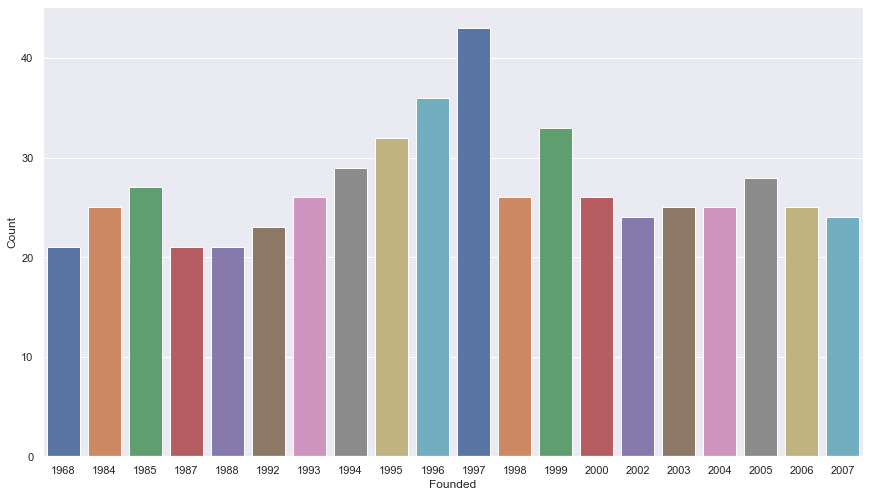

In [1270]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
founded_bar = sns.barplot(x = 'Founded', y = 'Count', data = forbes_FoundedCountTop, palette = 'deep')

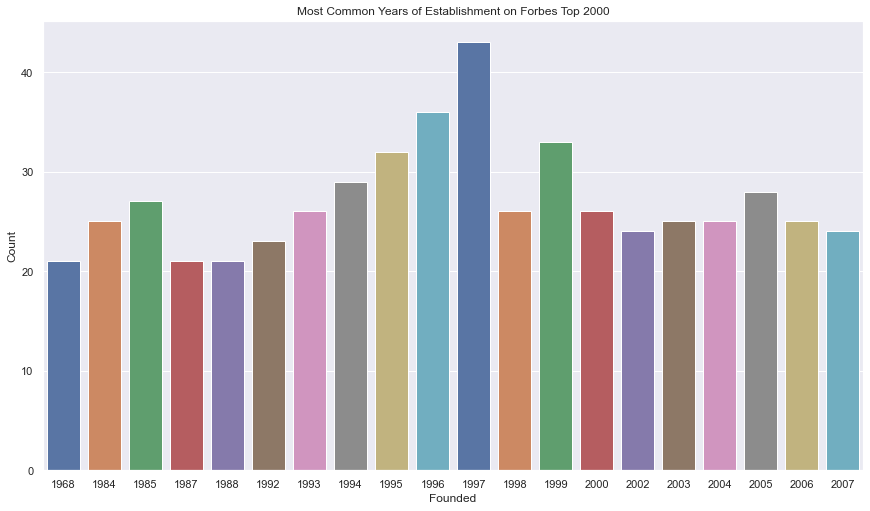

In [1271]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
founded_bar = sns.barplot(x = 'Founded', y = 'Count', data = forbes_FoundedCountTop, palette = 'deep').set_title("Most Common Years of Establishment on Forbes Top 2000")

### Top Companies
Rank, Company will serve as indices

### Group by country:

In [1181]:
forbes_CountryCount = forbes.groupby('Country', as_index = False).count()

In [1182]:
cols = forbes_CountryCount.columns.tolist()
cols

['Country',
 'Rank',
 'Company',
 'Industry',
 'Assets',
 'Sales',
 'Profits',
 'Market Capitalization',
 'Employees',
 'Founded',
 'Chairman']

In [1183]:
cols = ['Country', 'Rank']

In [1184]:
forbes_CountryCount = forbes_CountryCount[cols]

In [1185]:
forbes_CountryCount = forbes_CountryCount.rename(columns = {'Rank': 'Count'})

In [1186]:
forbes_CountryCount = forbes_CountryCount.sort_values(by = ['Count'], ascending = False)

In [1187]:
forbes_CountryCount = forbes_CountryCount.reset_index()

In [1188]:
forbes_CountryCount = forbes_CountryCount.drop('index', axis = 1)

In [1189]:
forbes_CountryCount = forbes_CountryCount.iloc[:20]

In [1190]:
forbes_CountryCount.index = forbes_CountryCount.index + 1

In [1191]:
forbes_CountryCount

,Country,Count
1,United States,522
2,Japan,208
3,China,187
4,United Kingdom,81
5,South Korea,55
6,France,54
7,India,52
8,Hong Kong,51
9,Germany,50
10,Canada,45


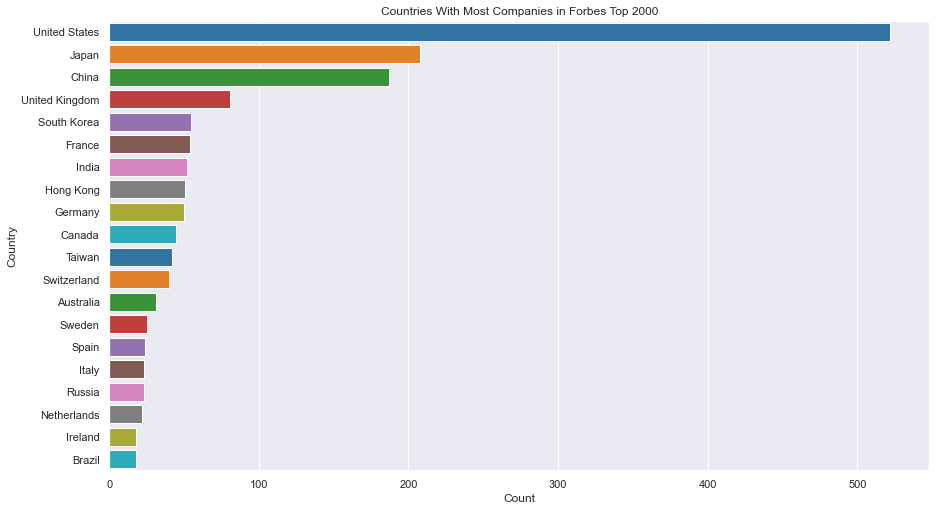

In [1272]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
country_bar = sns.barplot(x = 'Count', y = 'Country', data = forbes_CountryCount, orient = 'h', palette = 'tab10').set_title("Countries With Most Companies in Forbes Top 2000")

##### American Companies

In [1229]:
forbes_US = forbes.loc[forbes['Country'] == 'United States']
forbes_US.sort_values('Assets', ascending = False)

,Rank,Company,Country,Industry,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
385,#394,Fannie Mae,United States,Investment Services,3.364400e+12,1.141000e+11,4.000000e+09,1.500000e+09,7200,1938,Tim Mayopoulos
2,#3,JPMorgan Chase,United States,Major Banks,2.609800e+12,1.182000e+11,2.650000e+10,3.877000e+11,252539,1968,Jamie Dimon
5,#6,Bank of America,United States,Major Banks,2.328500e+12,1.030000e+11,2.030000e+10,3.135000e+11,209000,1904,Brian Moynihan
378,#387,Freddie Mac,United States,Investment Services,2.022500e+12,7.350000e+10,6.300000e+09,8.580000e+08,6185,1970,Donald Layton
365,#374,Citigroup,United States,Major Banks,1.922100e+12,9.050000e+10,-5.800000e+09,1.858000e+11,209000,1998,Michael Corbat
...,...,...,...,...,...,...,...,...,...,...,...
1851,#1881,Murphy USA,United States,Specialty Stores,2.300000e+09,1.310000e+10,2.880000e+08,2.200000e+09,9600,2013,R. Clyde
1918,#1952,Match Group,United States,Software & Programming,2.200000e+09,1.400000e+09,4.310000e+08,1.120000e+10,1400,2009,Mandy Ginsberg
1910,#1941,Splunk,United States,Computer Services,2.000000e+09,1.300000e+09,-2.590000e+08,1.680000e+10,3200,2003,Doug Merritt
1739,#1767,Align Technology,United States,Medical Equipment & Supplies,1.800000e+09,1.600000e+09,2.580000e+08,2.300000e+10,8715,1997,Joseph Hogan


### Group by Industry

In [1193]:
forbes_IndustryCount = forbes.groupby('Industry', as_index = False).count()

In [1194]:
cols = ['Industry', 'Rank']

In [1195]:
forbes_IndustryCount = forbes_IndustryCount[cols]

In [1196]:
forbes_IndustryCount

,Industry,Rank
0,Advertising,6
1,Aerospace & Defense,21
2,Air Courier,6
3,Airline,24
4,Aluminum,7
...,...,...
77,Telecommunications services,52
78,Thrifts & Mortgage Finance,1
79,Tobacco,8
80,Trading Companies,14


In [1197]:
forbes_IndustryCount = forbes_IndustryCount.rename(columns = {'Rank': 'Count'})

In [1198]:
forbes_IndustryCount = forbes_IndustryCount.sort_values(by = ['Count'], ascending = False)

In [1199]:
forbes_IndustryCount = forbes_IndustryCount.iloc[:15]

In [1200]:
forbes_IndustryCount = forbes_IndustryCount.reset_index()

In [1201]:
forbes_IndustryCount = forbes_IndustryCount.drop('index', axis = 1)

In [1202]:
forbes_IndustryCount.index = forbes_IndustryCount.index + 1 

In [1203]:
forbes_IndustryCount

,Industry,Count
1,Regional Banks,225
2,Oil & Gas Operations,79
3,Investment Services,79
4,Electric Utilities,74
5,Real Estate,71
6,Major Banks,60
7,Telecommunications services,52
8,Construction Services,48
9,Diversified Insurance,45
10,Business & Personal Services,40


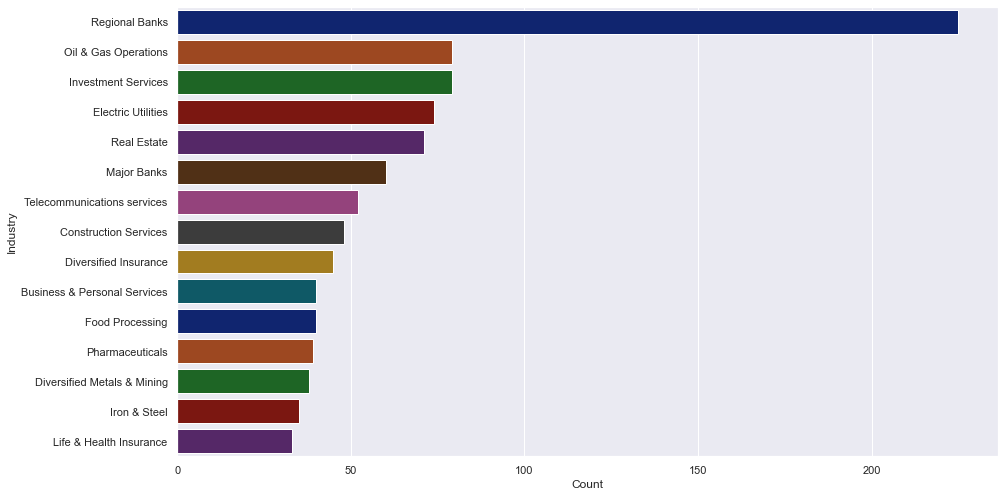

In [1273]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
industry_bar = sns.barplot(x = 'Count', y='Industry', data = forbes_IndustryCount, palette = 'dark', orient = 'h')

### Group by Country and Industry
You will probably want to do a for loop to get plots for each country

In [1205]:
forbes_country_industry = forbes.groupby(['Country', 'Industry']).size()

In [1206]:
forbes_country_industry.head(100)

Country    Industry                    
Argentina  Oil & Gas Operations            1
           Regional Banks                  1
Australia  Airline                         1
           Business & Personal Services    1
           Casinos & Gaming                1
                                          ..
China      Diversified Insurance           2
           Diversified Metals & Mining     8
           Diversified Utilities           1
           Drug Retail                     1
           Electric Utilities              8
Length: 100, dtype: int64

##### Group by country and founded

##### Group US by founded

In [1262]:
forbes_USFounded = forbes_US.groupby('Founded', as_index = False).count().sort_values(by = 'Rank', ascending = False).iloc[:20]

In [1263]:
cols = ['Founded', 'Count']

In [1264]:
forbes_USFounded = forbes_USFounded.rename(columns = {'Rank': 'Count'})

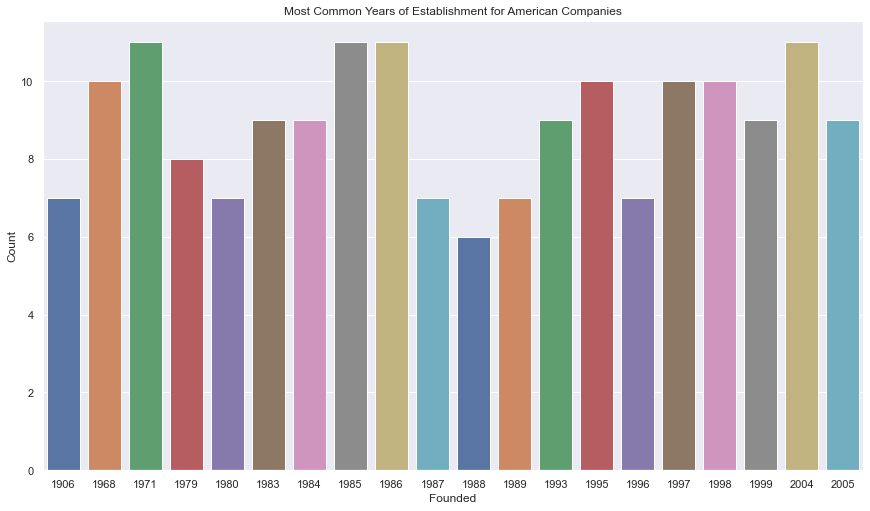

In [1265]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
USfounded_bar = sns.barplot(x = 'Founded', y = 'Count', data = forbes_USFounded, palette = 'deep').set_title("Most Common Years of Establishment for American Companies")

##### Group by industry and founded

##### Group American companies by industry

In [1209]:
forbes_USIndustry = forbes_US.groupby('Industry', as_index = False).count()

In [1210]:
forbes_USIndustry

,Industry,Rank,Company,Country,Assets,Sales,Profits,Market Capitalization,Employees,Founded,Chairman
0,Advertising,2,2,2,2,2,2,2,2,2,2
1,Aerospace & Defense,12,12,12,12,12,12,12,12,12,12
2,Air Courier,3,3,3,3,3,3,3,3,3,3
3,Airline,6,6,6,6,6,6,6,6,6,6
4,Aluminum,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
73,Specialized Chemicals,8,8,8,8,8,8,8,8,8,8
74,Specialty Stores,12,12,12,12,12,12,12,12,12,12
75,Telecommunications services,7,7,7,7,7,7,7,7,7,7
76,Tobacco,2,2,2,2,2,2,2,2,2,2


In [1211]:
cols = ['Industry', 'Rank']

In [1212]:
forbes_USIndustry = forbes_USIndustry[cols]

In [1213]:
forbes_USIndustry = forbes_USIndustry.rename(columns = {'Rank': 'Count'})

In [1214]:
forbes_USIndustry = forbes_USIndustry.sort_values(by = ['Count'], ascending = False)

In [1215]:
forbes_USIndustry = forbes_USIndustry.reset_index()

In [1216]:
forbes_USIndustry = forbes_USIndustry.iloc[:20]

In [1217]:
forbes_USIndustry = forbes_USIndustry.drop('index', axis = 1)

In [1218]:
forbes_USIndustry.index = forbes_USIndustry.index + 1

In [1219]:
forbes_USIndustry

,Industry,Count
1,Oil & Gas Operations,28
2,Real Estate,25
3,Investment Services,24
4,Electric Utilities,24
5,Regional Banks,19
6,Business & Personal Services,18
7,Semiconductors,17
8,Food Processing,14
9,Software & Programming,14
10,Specialty Stores,12


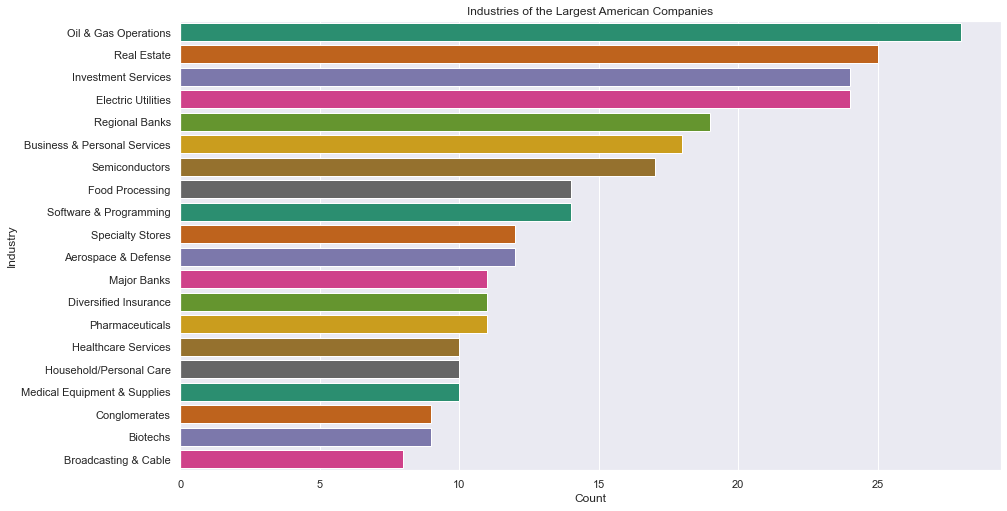

In [1274]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
USIndustry_bar = sns.barplot(x = 'Count', y = 'Industry', data = forbes_USIndustry, orient = 'h', palette = 'Dark2').set_title("Industries of the Largest American Companies")

##### Regression/Scatter plots for numerical data: Assets, Sales, Profits, Market Cap, Employees

In [ ]:
# start with correlation heatmap here and get rid of some of the less interesting scatterplots. too much bs here

In [1336]:
forbes.corr()

,Assets,Sales,Profits,Market Capitalization,Employees,Founded
Assets,1.000000,0.367808,0.490986,0.320224,0.224837,-0.081017
Sales,0.367808,1.000000,0.571442,0.554797,0.634357,-0.069690
Profits,0.490986,0.571442,1.000000,0.714161,0.314648,-0.035513
Market Capitalization,0.320224,0.554797,0.714161,1.000000,0.308573,-0.032288
Employees,0.224837,0.634357,0.314648,0.308573,1.000000,-0.038618
Founded,-0.081017,-0.069690,-0.035513,-0.032288,-0.038618,1.000000


In [1346]:
forbesAssets = forbes.sort_values("Assets", ascending = False)

In [1347]:
forbes1 = forbesAssets.iloc[:100]

In [1348]:
forbes2 = forbesAssets.iloc[950:1050]

In [1349]:
forbes1.corr()

,Assets,Sales,Profits,Market Capitalization,Employees,Founded
Assets,1.000000,0.189180,0.418485,0.220902,0.426774,0.080572
Sales,0.189180,1.000000,0.618335,0.690153,0.647995,0.046573
Profits,0.418485,0.618335,1.000000,0.829422,0.542113,0.091640
Market Capitalization,0.220902,0.690153,0.829422,1.000000,0.466316,0.059329
Employees,0.426774,0.647995,0.542113,0.466316,1.000000,0.066202
Founded,0.080572,0.046573,0.091640,0.059329,0.066202,1.000000


In [1350]:
forbes2.corr()

,Assets,Sales,Profits,Market Capitalization,Employees,Founded
Assets,1.000000,0.072612,0.042090,0.054532,0.053327,0.135904
Sales,0.072612,1.000000,0.192992,0.285076,0.310946,-0.188410
Profits,0.042090,0.192992,1.000000,0.589800,0.186773,0.103027
Market Capitalization,0.054532,0.285076,0.589800,1.000000,0.210877,0.051217
Employees,0.053327,0.310946,0.186773,0.210877,1.000000,0.022724
Founded,0.135904,-0.188410,0.103027,0.051217,0.022724,1.000000


Compare correlations here to justify which scatterplots you are making

In [1366]:
#######################################################

# Assets vs Sales

Top 100

Text(0.5, 1.0, 'Top 100')

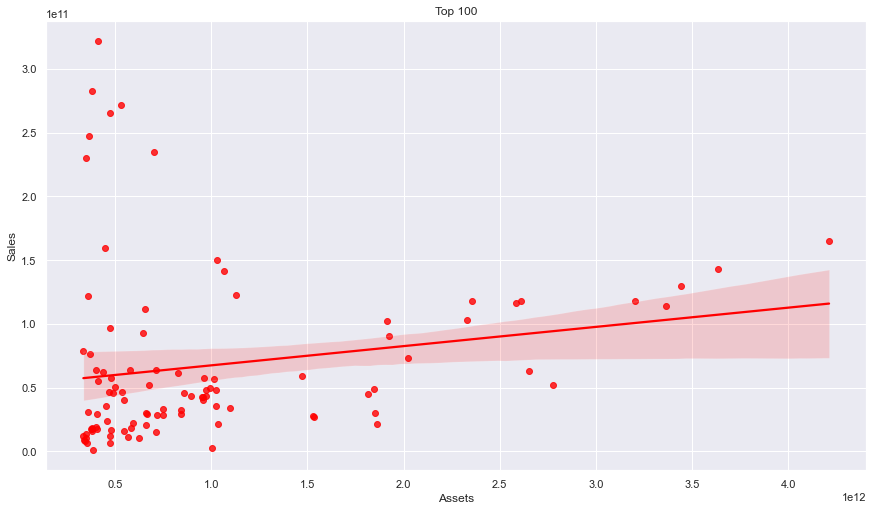

In [1351]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Sales", data = forbes1, color = 'red').set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

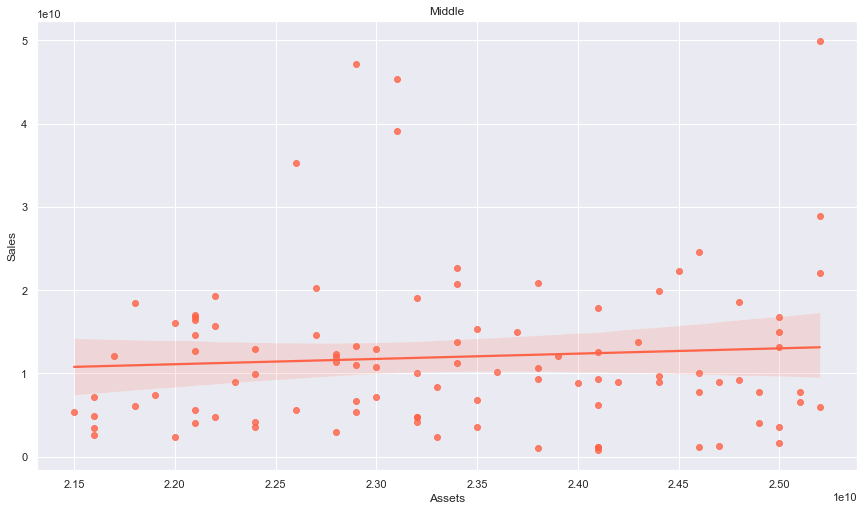

In [1352]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Sales", data = forbes2, color = "tomato").set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

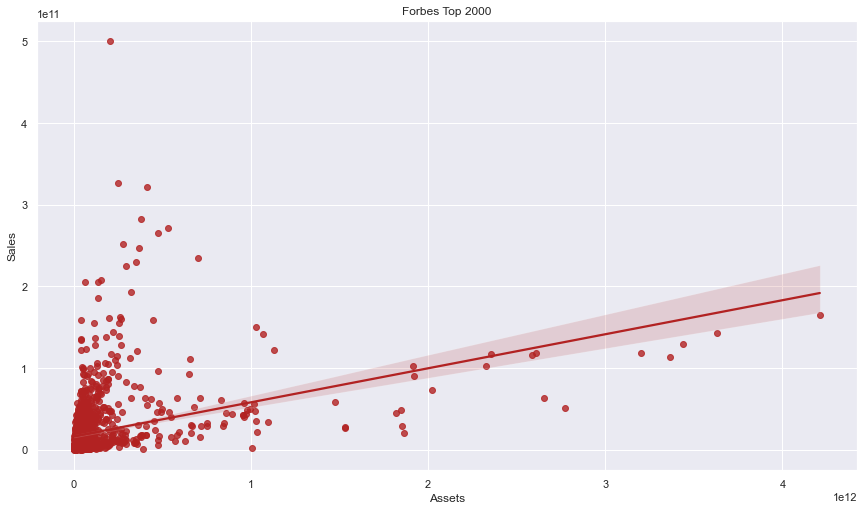

In [1353]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Sales", data = forbes, color = 'firebrick').set_title("Forbes Top 2000")

# Assets vs Market Cap

Top 100

Text(0.5, 1.0, 'Top 100')

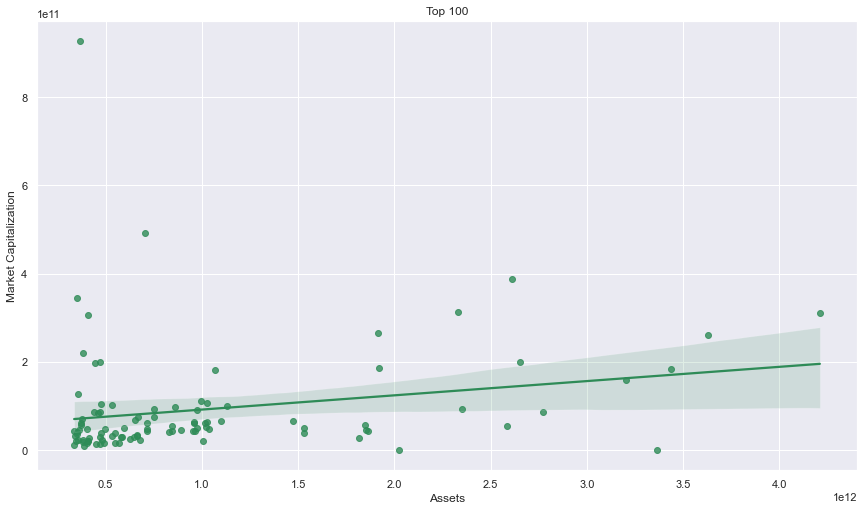

In [1354]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes1, color = 'seagreen').set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

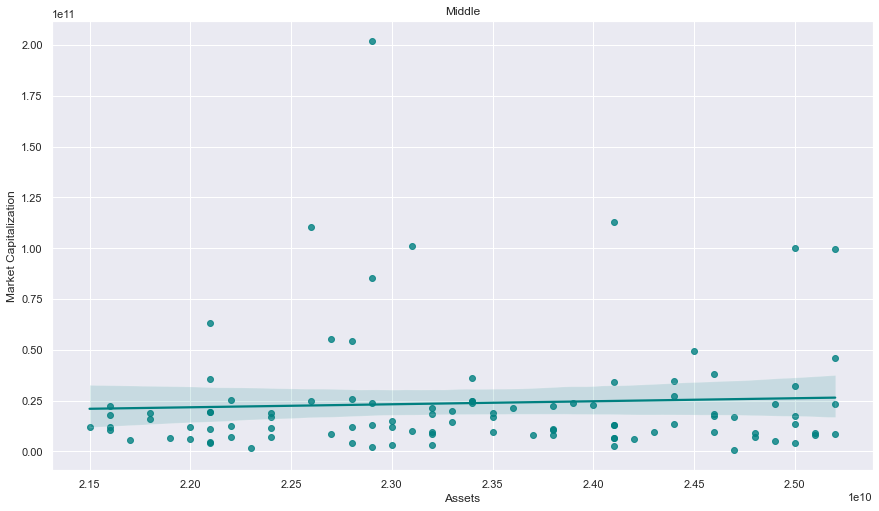

In [1355]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes2, color = 'teal').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

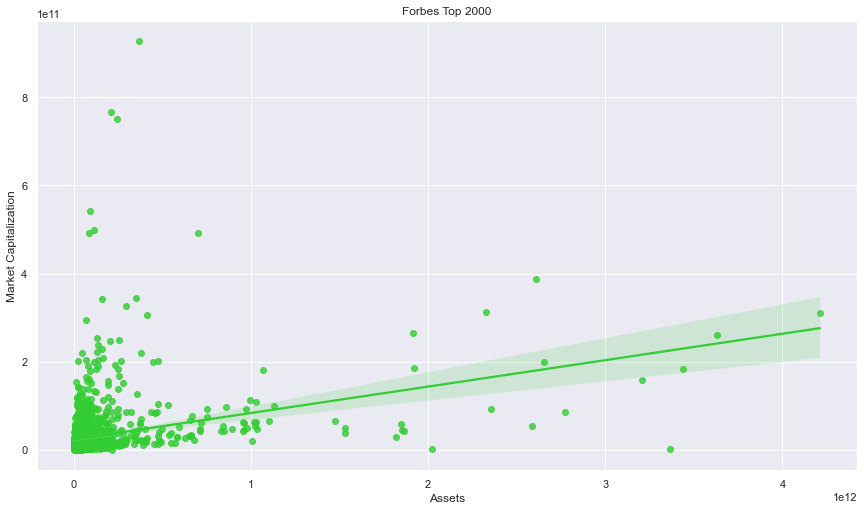

In [1356]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Market Capitalization", data = forbes, color = 'limegreen').set_title("Forbes Top 2000")

# Market Cap vs Profit

Top 100

Text(0.5, 1.0, 'Top 100')

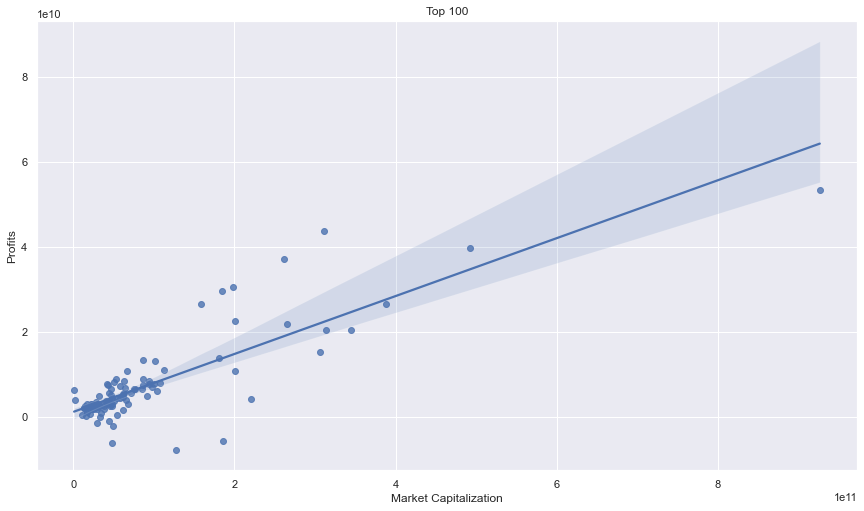

In [1357]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes1).set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

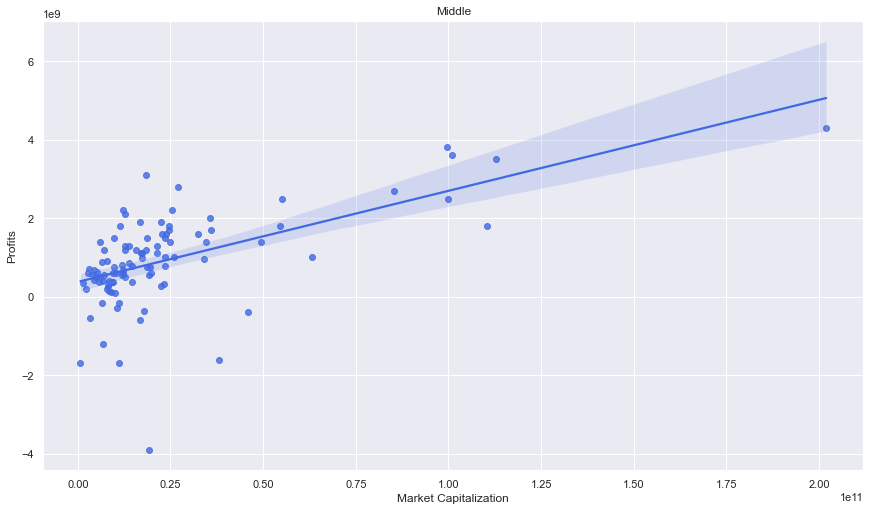

In [1358]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes2, color = 'royalblue').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

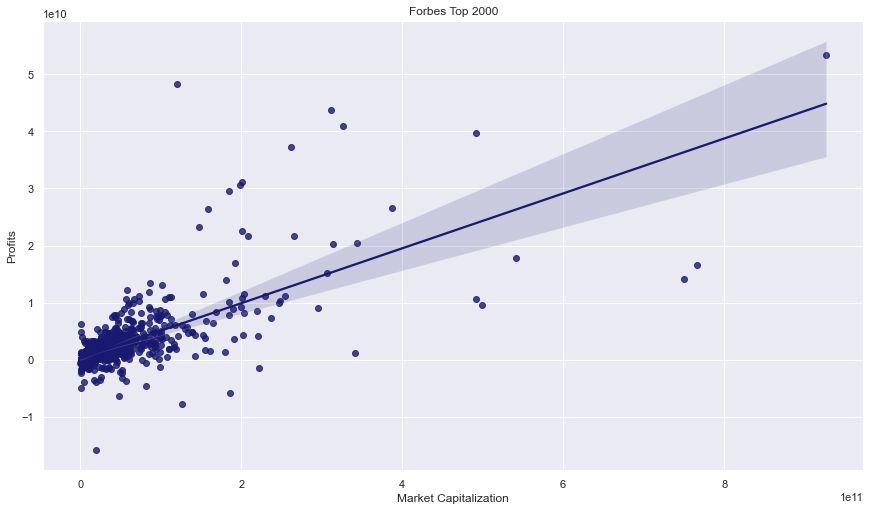

In [1359]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Profits", data = forbes, color = 'midnightblue').set_title("Forbes Top 2000")

# Assets vs Profit

Top 100

Text(0.5, 1.0, 'Top 100')

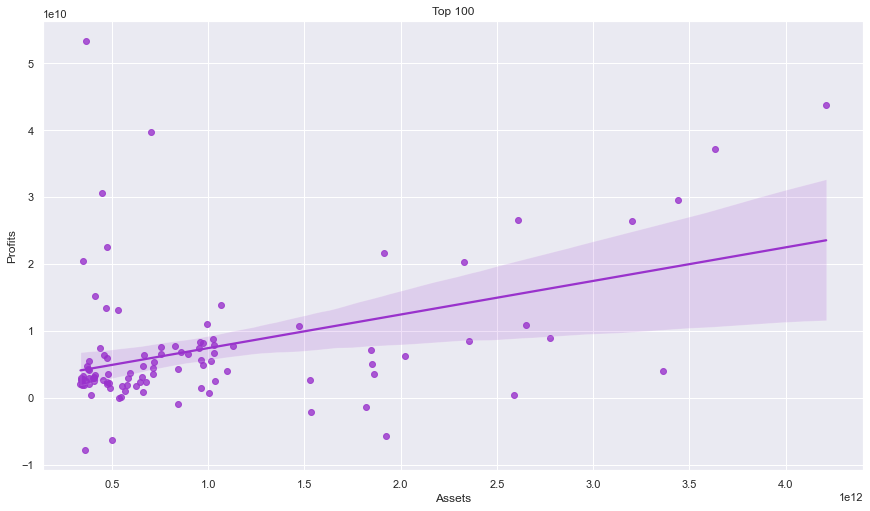

In [1360]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Profits", data = forbes1, color = "darkorchid").set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

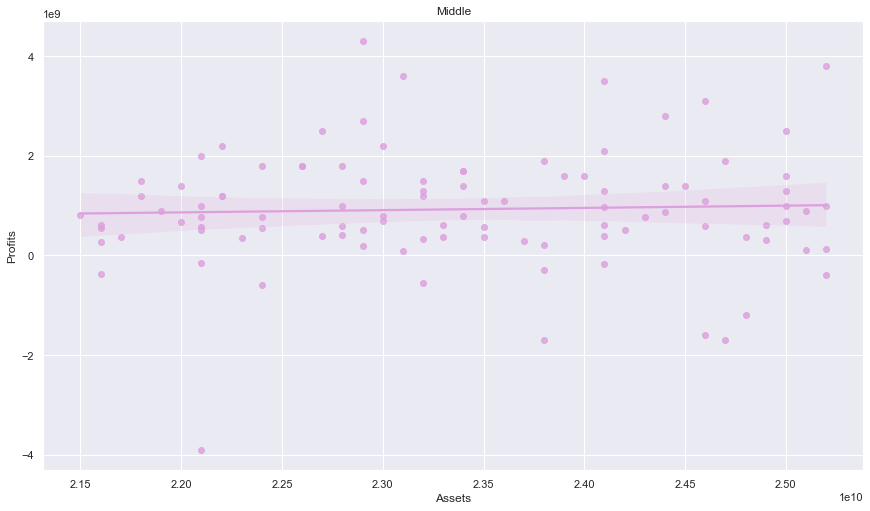

In [1361]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Profits", data = forbes2, color = 'plum').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

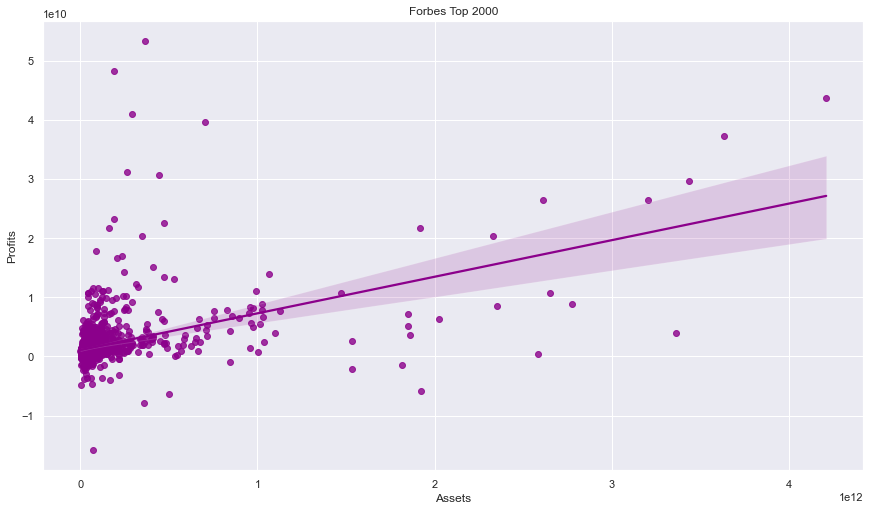

In [1362]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Assets", y = "Profits", data = forbes, color = 'darkmagenta').set_title("Forbes Top 2000")

# Market Cap vs. Sales

Top 100

Text(0.5, 1.0, 'Top 100')

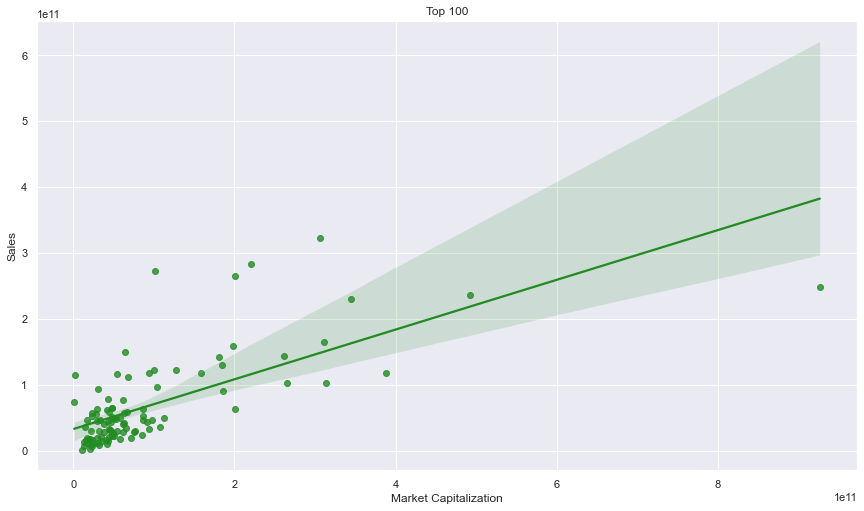

In [1363]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes1, color = 'forestgreen').set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

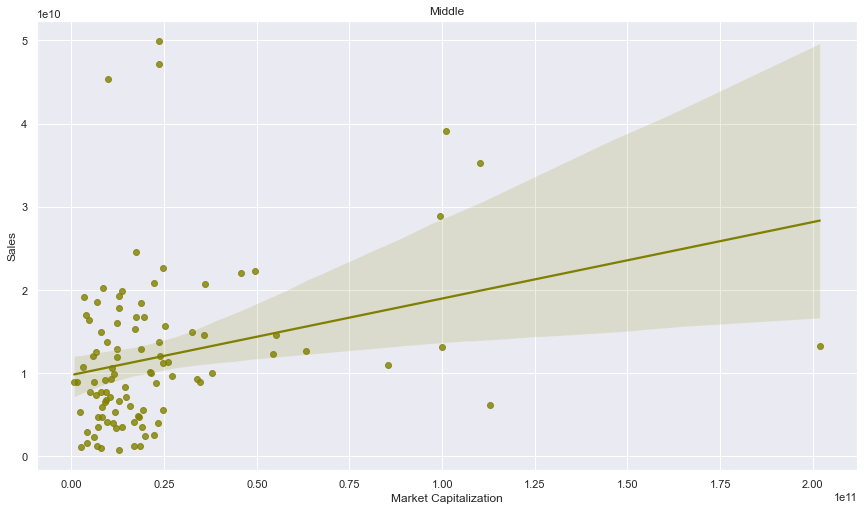

In [1364]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes2, color = 'olive').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

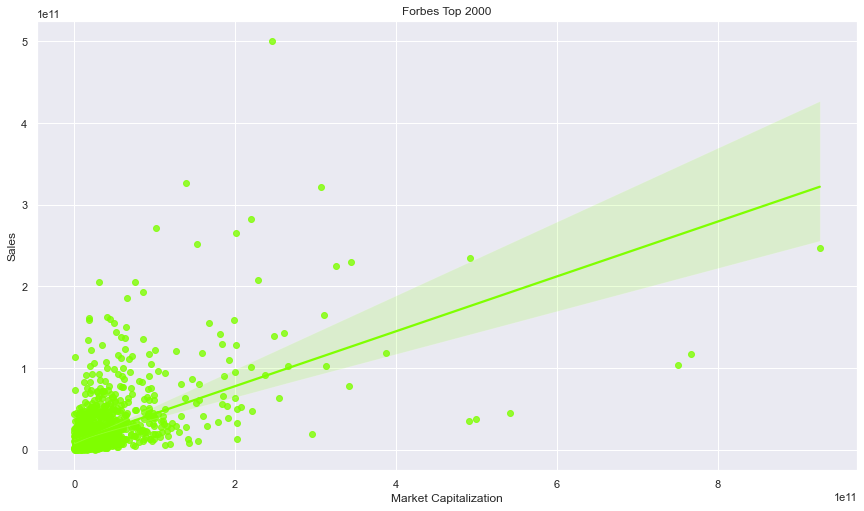

In [1365]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Capitalization", y = "Sales", data = forbes, color = 'chartreuse').set_title("Forbes Top 2000")